In [1]:
import pandas as pd
import numpy as np

file_path = ('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
df = pd.read_csv(file_path)
df.head()
#file_path(caminho_arquivo)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Importamos o pandas para melhora a analise das nossas tabelas, numpy para ajuda no calculo de dados e o matplotlib.pyplot com ele podemos imrpota tabelas em 3D.

In [2]:
df = df.rename(columns={'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcalinity': 'Alcalinidade_po', 'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                                      'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

columnsC = df.columns
columnsC

Index(['Alcool', 'Malic_Acid', 'Po', 'Ash_Alcanity', 'Magnesio',
       'Total_Fenois', 'Flavanoids', 'Fenois_nao_flavalonoides',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

{count: É o número de ocorrencias} {mean: é a média aritmética simples. Através dela nós conseguimos ver como que os nossos dados estão variando} {std(standard deviation): Basicamente, o desvio padrão mede o quanto os nossos dados estão dispersos em relação a média}; {25%, 50% e 75%: Quantis.} {Perceber que 25% dos nossos dados têm valor menor do que 12.36 para o Alcool, 1.60 para o Acido_ Malico e 2.21 para o Po.}

{O quantil 50% também é chamado de mediana, significa que metade dos nossos valores estão abaixo desse valor, metade dos nossos dados estão abaixo desse valor para esse atributo e a outra metade está acima.}

{Esse quantil 75% nos indica, assim como os outros, que 75% dos nossos dados estão abaixo desse valor.}

In [3]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

matrix_corr = df.corr()

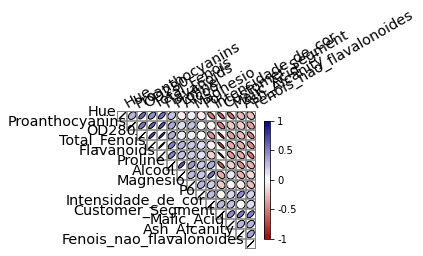

In [4]:
corr_graf = corrplot.Corrplot(matrix_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')


Pela analise feita os gráficos em azul são os postivos e os em vermeçhos negativos

**Correlação posivita**: Se um aumanta outros iram aumenta de maneira semelhante
**Correlação negativa**: Se um aumenta o outro diminui

Quanto mais próximo de uma linha reta esse desenho que nós temos aqui, maior é a nossa correlação, porque a correlação indica o quanto dois atributos ou duas séries variam de maneira proporcional.

Como nós podemos perceber, Malic_Acid com o Malic_Acid é uma linha reta perfeita. Por quê? Porque eles variam da mesma maneira, uma vez que são o mesmo atributo.
 
 Algumas informações importantes que nós podemos extrair daqui são as seguintes: Total_Fenois é bastante correlacionado com Flavanoids. É bastante mesmo, é quase uma linha reta e é correlacionado de maneira positiva.

 Isso quer dizer que quando o Total_Fenois aumentar, Flavanoids também aumenta de maneira praticamente proporcional. Isso porque como nós tínhamos visto ao utilizarmos o método describe(), Flavanoids é basicamente boa parte de Total_Fenois.

Uma outra coisa interessante que nós podemos ver, por exemplo, é que a correlação entre Hue e Malic_Acid é uma correlação negativa. Isso quer dizer que quando Hue aumenta Malic_Acid diminui.


Isso é muito bom quando nós queremos remover alguns atributos de informação redundante. Por exemplo: no nosso caso aqui, como Flavanoids é extremamente relacionado com Total_Fenois. Eles têm informação redundante, ou seja, informações que representam a mesma coisa.



In [5]:
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

C:\Users\joaor\AppData\Local\Temp\ipykernel_11172\1652039367.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 936x576 with 0 Axes>

In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

In [7]:
df = pd.DataFrame(np_df, columns = columnsC)

In [8]:
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


usamos um processo de normalização que coloca os atributos das variaveis na mesma faicha ou seja (0,1) e (-1 e 1)

In [9]:
np_df = min_max_scaler.inverse_transform(df)

In [10]:
df_non_normalized = pd.DataFrame(np_df, columns = columnsC)
df_non_normalized.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [11]:

attributes = df.columns

 nós iremos fazer um for, ou seja, para atributo em atributos. Nós iremos utilizar uma forma de normalização chamado MinMaxScaler, ou seja, normalização pelo mínimo e pelo máximo.

In [12]:
for attributes in attributes:
    df[attributes] = (df[attributes]-min(df[attributes]))/max(df[attributes])-min(df[attributes])
df.head()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


todas as amostras agora estão variando entre 0 e 1

In [13]:
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

nós devemos transformar isso para o nosso Pandas DataFrames. Para fazermos isso, como iremos fazer df = pd.DataFrame, ou seja, vamos converter para DataFrame, passaremos o nome para ele como entrada, o nosso np_df e como as colunas, nós iremos passar as colunas do nosso DataFrame, para termos os nomes dos atributos nos locais corretos.

In [14]:
df = pd.DataFrame(np_df, columns= columnsC)
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
np_df = min_max_scaler.inverse_transform(df)
df = pd.DataFrame(np_df, columns = columnsC)
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Apos fazer todo o agrupamento de dados iremos agrupá-los ultilizando o KMeans. Isso ira iniciar o agrupament, ou seja, clusterizar ele recebera o número de clusters.

In [16]:
from sklearn.cluster import KMeans
bundler = KMeans(n_clusters=4)

bundler = Agrupador

In [17]:
bundler = KMeans(n_clusters=4)

In [18]:
from sklearn.cluster import KMeans

bundler = KMeans(n_clusters=4)
bundler.fit(df)
labels = bundler.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 1 3 1 1 1 3 1 3 1 1 1
 1 3 1 3 1 1 1 1 3 3 1 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 3 3 3 1 1 1
 1 3 3 3 3 1 1 3 1 1 1 1 1 1 1 1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
import plotly.graph_objs as go

labels = agrupador.labels_
print(labels)

In [20]:
import matplotlib.pyplot as plt

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], y = df['Alcool'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = bundler.labels_.astype(np.float)),
                                                        text = labels))
fig.show()

C:\Users\joaor\AppData\Local\Temp\ipykernel_11172\975769274.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Foi criado um gráfico de 3 dimensões onde é possivel da zoom com o botão esquedo do mause, além disso por ser de 3 dimensões o x passou a ser a "intensidade_de_cor", o y foi colocado o "Alcool" mas poderia ser qualquer outro atributo, o mode vai ser a forma com as bolinhas vão ser atrávez de markers, "marcadores" e o tipo de marker que foi utilizado agora vai ser o dict() um dicionário no qual nós iremos selecionar a cor da nossa bolinha de acordo com o label que ela foi selecionada, ou seja, o grupo que ela foi colocada.

In [21]:
bundler = KMeans(n_clusters= 3)
bundler.fit(df)
labels = bundler.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'],
                        y = df["Alcool"], mode = "markers",                      
                            marker = dict(color = bundler.labels_.astype(np.float)),
                        text = labels))


C:\Users\joaor\AppData\Local\Temp\ipykernel_11172\1664485020.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Diminuindo o número de grupos para 3 assim ficou melhor a visualização, assim deu para notar que o grupo roxo ficou mais junto, assim como o amarelo e rosa

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                        y = df["Alcool"], z = df["Proline"] ,mode = "markers",                      
                            marker = dict(color = bundler.labels_.astype(np.float)),
                        text = [0, 1, 2]))






C:\Users\joaor\AppData\Local\Temp\ipykernel_11172\2143115090.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Apos coloca o "Scatter3d" isso fez com que nosso grafico de bolinhas fica se mais organizado assim podendo facilitar melhor a fizualização, e por conter apenas 3 grupos foram classificadas como [0, 1, 2]

In [24]:
fig.update_layout(scene = dict(
    xaxis_title = "Intensidade de cor",
    yaxis_title = " Álcool",
    zaxis_title = "Proline"
))
fig.show()

Apos coloca o "fig.update_layout" conseguimos fazer com que nosso gráfico fica se mais arrumando trocando as letras x,y e z para "Intensidade de cor", "Álcool" e "Proline"

In [25]:
center = pd.DataFrame(bundler.cluster_centers_)
center.columns = columnsC
center.head()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
1,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
2,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796


In [26]:
fig.add_trace(go.Scatter3d(x=center['Intensidade_de_cor'],
                        y = center["Alcool"], z = center["Proline"] ,mode = "markers",                      
                            marker = dict(color = "red"),
                        text = [0, 1, 2]))

fig.show()

Como pode notar as bolinhas vermelhas são os centros(0, 1, 2). Assim dá para percebermos que, por exemplo, o centro do cluster 1 está bem definido com três atributos, do cluster 2 e do cluster 3 já estão bem próximos, o que mostra que três atributos não são o suficiente para visualizamos bem a clusterização, mas já é melhor que dois. Ele dá uma ideia muito legal de como ficou.

In [27]:
from sklearn.cluster import DBSCAN

bundler = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
bundler.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

Usaremos agora outro agrupador é um outro algoritmo de clusterização bastante conhecido é um algoritmo chamado DBSCAN, que é a sigla em inglês para “agrupamento espacial baseado em densidade de aplicações com ruídos”.

Logo teremos que coloca alguns parametros "eps = 1.31", que significa a distância máxima entre dois pontos para que eles possam ser considerados vizinhos ou pertencentes ao mesmo cluster. Outra informação interessante que sera passada é o "min_samples" que é o número mínimo de pontos para que eu possa formar um cluster. Além disso sera necessario passa uma métrica de distância, em outras palvras uma forma de avaliar a distância entre os pontos. Nesse caso sera usado o 'manhattan'.

Após isso é so ver o "bundler.labels_"

In [28]:
bundler.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

Após isso é possivel perceber que o DBSCAN acresentou o número "-1", pois o DBSCAN é feito para **aplicações com ruido** ele considera que qualquer ponto que não esteja dentro dessa distância de 1.31, que é a máxima dos grupos, ele considera que isso é um ruído.

Logo teremos que coloca alguns parametros "eps = 1.31", que significa a distância máxima entre dois pontos para que eles possam ser considerados vizinhos ou pertencentes ao mesmo cluster. Outra informação interessante que sera passada é o "min_samples" que é o número mínimo de pontos para que eu possa formar um cluster. Além disso sera necessario passa uma métrica de distância, em outras palvras uma forma de avaliar a distância entre os pontos. Nesse caso sera usado o 'manhattan'.

In [29]:
np.unique(bundler.labels_)

array([-1,  0,  1,  2], dtype=int64)

Para vermos o número total de clusters foi ultilizado a função NumPy chama unique()

Quando foi utilizados isso, percebe se que temos -1, 0, 1 e 2. É interessante que diferentemente do KMeans nós não passamos o número de cluster, o algoritmo automaticamente define quantos grupos ele acha que são necessários, respeitando essas duas regras que foram colocadas.

OBS: O eps, que é a distância máxima entre dois pontos, e o min_samples, que é 15, que é o número mínimo de amostras para um grupo.

Umaa grande dificuldade do DBSCAN, muitas vezes é definir o eps e min_samples, porque varia bastante de acordo com a densidade dos dados.

In [30]:
bundler = DBSCAN(eps = 1.5, min_samples = 15, metric = 'manhattan')
bundler.fit(df)
bundler.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

 Lembrando: a distância de 'manhattan', basicamente é uma distância que vai sempre seguindo em linha reta, linhas horizontais e linhas verticais. Se eu mudar isso aqui para distância euclidiana vamos ver o que acontece, euclidean de distância euclidiana.

In [31]:
#bundler = DBSCAN(eps = 1.5, min_samples = 15, metric = 'euclidean')
#bundler.fit(df)
#bundler.labels_

bem diferente da 'manhattan'. Se nós lembrarmos da manhattan vai ter apenas dois clusters. Se for colocado a distância euclidean, o que acontece? Temos apenas um cluster, ou seja, a métrica de distância importa muito. Porque ela influência em como eu avalio o eps.

OBS: **O eps é sempre calculado em cima de uma métrica de distância.** A métrica de distância é extremamente importante na hora da minha clusterização.

Repare que como todos os nossos pontos ficaram no mesmo cluster, significa que o nosso eps está muito grande.

Se for colocar um número de eps menor por ecemplo 0.7

In [32]:
#bundler = DBSCAN(eps = 0.7, min_samples = 15, metric = 'euclidean')
#bundler.fit(df)
#bundler.labels_

Se for colocar 0.5, teremos dois clusters e ruído. Uma situação um pouco semelhante a qual estávamos antes.

In [33]:
#bundler = DBSCAN(eps = 0.5, min_samples = 15, metric = 'euclidean')
#bundler.fit(df)
#bundler.labels_

OBS:Basicamente, o que nós pudemos perceber através disso? O eps e o min_samples variam de maneira inversamente proporcional, ou seja, o efeito que eu causo aumentando o eps é o mesmo efeito que eu causo diminuindo o min_samples. O efeito que eu causo aumentando o min_samples é o mesmo efeito que eu causo diminuindo o eps.

A métrica de distância influencia bastante. Por quê? Porque ela influencia na forma como eu calculo o eps.

Outras metricas que podem ser ultilizadas são: Do scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]

In [34]:
from sklearn.cluster import MeanShift


In [35]:
bundler = MeanShift()
bundler.fit(df)
bundler.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Todos os nossos clurster foram agrupados 

In [36]:
from sklearn.cluster import estimate_bandwidth

In [37]:
BW = estimate_bandwidth(df, quantile= 0.2)
bundler = MeanShift()
bundler.fit(df)
bundler.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Ajustando o agrupamento dos clusters

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'], 
                           y = df['Alcool'], 
                           z = df['Proline'], 
                           mode = 'markers', 
                           marker = dict(color = labels.astype(float)), 
                           text = labels))

fig.show()

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
range_not_clusters = [i for i in range(2,10)]
print(range_not_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


criamos uma linha de codigo para variar o numero de clusters

In [41]:
from sklearn.cluster import KMeans

In [42]:
silhouette_values = []
for k in range_not_clusters:
    bundler = KMeans(n_clusters=k) 
    labels = bundler.fit_predict(df)
    silhouette_average = silhouette_score(df, labels)
    silhouette_values.append(silhouette_average)


OBS:O silhouette_score nos devolve o valor da média do coeficiente de silhueta médio das nossas amostras

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = range_not_clusters, y = silhouette_values))
fig.update_layout(
    title = "Valores de Silhueta Médio",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio silhueta",
)

OBS:Como se podemos perceber o maior valor de coeficiente de silhueta que se tem é quando o valor de K, que é o número de clusters, é igual a 3.

In [44]:
range_quantile = np.linspace(0.02, 0.5, 30)
range_quantile

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

isso ira nos ajudar a criar 15 posições 

In [45]:
silhouette_values = []
quantil_plot = []

for quantile in range_quantile:
    bandwidth = estimate_bandwidth(df, quantile= quantile)
    bundler = MeanShift(bandwidth = bandwidth)
    labels = bundler.fit_predict(df)
    
    if (len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
        silhouette_average = silhouette_score(df, labels)
        silhouette_values.append(silhouette_average)
        quantil_plot.append(quantile)

Todo esse codigo criado ira nos ajuda a a gera o quantil de clusters

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = silhouette_values))
fig.update_layout(dict(xaxis_title = "Quantil",
                       yaxis_title = "Média Silhueta")),
fig.show()

OBS:Mais uma vez, é um valor um pouco longe do 1. É um valor ótimo do ponto de vista do MeanShift, mas isso nos indica que talvez o MeanShift não seja o melhor método para agruparmos os nossos dados, uma vez que o valor de coeficiente de silhueta deu um valor bom, mas não foi tão bom assim, pensando que ele poderia chegar até em 1.

In [47]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [48]:
bundler_kmeans = KMeans(n_clusters=3)
bundler_DBSCAN = DBSCAN(eps=2.1, min_samples=56, metric="manhattan")

BW = estimate_bandwidth(df, quantile= 0.28)
bundler_MeanShift = MeanShift(bandwidth=BW)

labels_kmeans = bundler_kmeans.fit_predict(df)
labels_dbscan = bundler_DBSCAN.fit_predict(df)
labels_meanshift = bundler_MeanShift.fit_predict(df)

print("Labels K-means: ",labels_kmeans)
print("Labels DBSCAN: ",labels_dbscan)
print("Labels MeanShift: ",labels_meanshift)

Labels K-means:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Para evitar qualquer porblema foi importados todas as bibliotecas novamentes;
Para podemos analisar os 3 metodos que foram ultilizados printamos cada um deles para termos uma ideia dos sues clusters,o kmeans nos deu 3 clusters, o dbscan nos deu apenas um cluster e varios ruidos e meanshift apenas 0 ou seja 1 cluster

In [49]:
print("O coeficiente de silhueta do k-means é: ",silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ",silhouette_score(df, labels_dbscan))
print("O coeficiente de silhueta do MeanShift é: ",silhouette_score(df, labels_meanshift))

O coeficiente de silhueta do k-means é:  0.36950618492736303
O coeficiente de silhueta do DBSCAN é:  0.3016232115094375
O coeficiente de silhueta do MeanShift é:  0.3059152866115628


com isso pode se analisar que o K-means é o melhor metodo para poder analisar esse tipo de dado, além disso para da pra se perceber que para esse tipo de dados o K-means é a melhor opção. Assim sempre que for aplicar alguma coisa relacionada clusterização, não se deve utilizar apenas uma técnica, mas várias e depois avaliarmos qual delas produziu o melhor resultado segundo algum tipo de análise, que no caso foi o coeficiente de silhueta. Uma vez analisado isso, você define a melhor técnica e utiliza essa para agrupar os seus dados.